In [5]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [6]:
titanic_df = pd.read_csv(r'J:\\Data_store\\titanic\\train.csv')
test_df = pd.read_csv(r'J:\\Data_store\\titanic\\test.csv')

In [7]:
tags=titanic_df.columns
for i in tags:
    titanic_df[i].count

In [8]:
# tags=titanic_df.columns()
# #Cabin
# # Sib Sp
# # Parch
# for i in 

In [9]:
titanic_df.shape
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
titanic_df.count()
test_df.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [11]:
value_counts = titanic_df['Pclass'].value_counts()
value_counts


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
value_counts = titanic_df['Survived'].value_counts()
value_counts


0    549
1    342
Name: Survived, dtype: int64

In [13]:
value_counts = titanic_df['Cabin'].value_counts()
value_counts
#Cabin도 중요한 데이터인 것 같지만 왜, 


B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [14]:
titanic_df.info()
print('_'*40)
test_df.info()

#타이타닉 데이터는 이미 가공이 꽤 된 데이터 구만

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

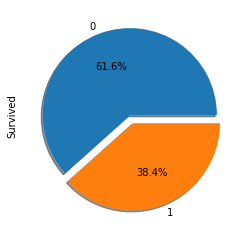

In [15]:
titanic_df["Survived"].value_counts().plot.pie( explode=[0,0.1], autopct='%1.1f%%', shadow=True)
plt.show()

In [16]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [17]:
titanic_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [18]:
titanic_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#siblings / spouses aboard the Titanic.  자녀 혹은 배우자랑 탄 녀석들..!, 많을 수록 아디오스...

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [19]:
pd.crosstab(titanic_df.Pclass,titanic_df.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [25]:
pd.crosstab(titanic_df.Age,titanic_df.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Age,,,
0.42,0,1,1
0.67,0,1,1
0.75,0,2,2
0.83,0,2,2
0.92,0,1,1
1.0,2,5,7
2.0,7,3,10
3.0,1,5,6
4.0,3,7,10


In [20]:
titanic_df["Age"].fillna( titanic_df.groupby(["Pclass", "Sex"])["Age"].transform("mean") , inplace = True)

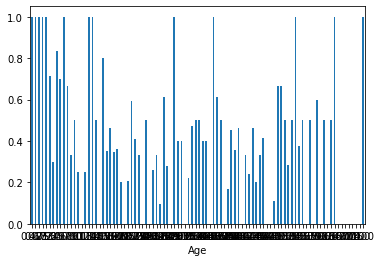

In [21]:
titanic_df.groupby('Age').mean()['Survived'].plot(kind = 'bar',rot = 0)
plt.show()

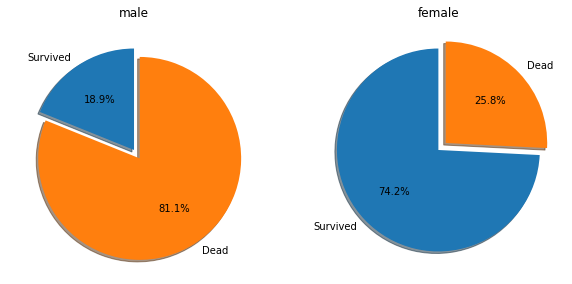

In [22]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Survived', 'Dead'
sizes_m = [len(titanic_df.loc[ (titanic_df["Sex"]=='male') & (titanic_df["Survived"]==1)]), \
         len(titanic_df.loc[ (titanic_df["Sex"]=='male')& (titanic_df["Survived"]==0)]) ]

sizes_f = [len(titanic_df.loc[ (titanic_df["Sex"]=='female') & (titanic_df["Survived"]==1)]), \
         len(titanic_df.loc[ (titanic_df["Sex"]=='female')& (titanic_df["Survived"]==0)]) ]

explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig = plt.figure()
fig.set_size_inches(10,5)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(sizes_m, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('male')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax2.pie(sizes_f, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.set_title('female')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [23]:
# one-hot-encoding을 이용해 치환 성별데이터를 바이너리 값으로 변환
pclass_train_dummies = pd.get_dummies(titanic_df['Pclass'])
pclass_test_dummies = pd.get_dummies(test_df['Pclass'])

In [24]:
# one-hot-encoding을 이용해 치환 성별데이터를 바이너리 값으로 변환
pclass_train_dummies = pd.get_dummies(titanic_df['Pclass'])
pclass_test_dummies = pd.get_dummies(test_df['Pclass'])

titanic_df.drop(['Pclass'], axis=1, inplace=True)
test_df.drop(['Pclass'], axis=1, inplace=True)

pclass_train_dummies.columns = ['First', 'Second', 'Third']
pclass_test_dummies.columns = ['First', 'Second', 'Third']

train_df = titanic_df.join(pclass_train_dummies)
test_df = test_df.join(pclass_test_dummies)